In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [57]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

In [74]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(32, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = 'softmax')

])



In [75]:
model.compile(optimizer= 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [76]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.5717 - accuracy: 0.8246 - val_loss: 0.1719 - val_accuracy: 0.9485
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2344 - accuracy: 0.9348 - val_loss: 0.1260 - val_accuracy: 0.9619
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1796 - accuracy: 0.9512 - val_loss: 0.1037 - val_accuracy: 0.9698
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1482 - accuracy: 0.9595 - val_loss: 0.0959 - val_accuracy: 0.9730
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1278 - accuracy: 0.9642 - val_loss: 0.0852 - val_accuracy: 0.9750
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1153 - accuracy: 0.9677 - val_loss: 0.0844 - val_accuracy: 0.9762
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1019 - accuracy: 0.9703 - val_loss: 0.0778 - val_accuracy: 0.9786
Epoch 

In [78]:
train_score = model.evaluate(x_train, y_train)
print("Train loss {:.4f}, Test accuracy {:.2f}%".format(train_score[0], train_score[1] * 100))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0145 - accuracy: 0.9959
Train loss 0.0145, Test accuracy 99.59%


In [79]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, Test accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9805
Test loss 0.0788, Test accuracy 98.05%


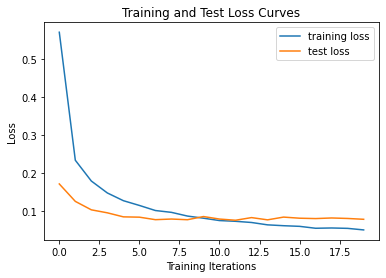

In [80]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Training and Test Loss Curves')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()